![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


## Instalación de Librerías y Carga de Datos.


Para el desarrollo de su proyecto, utilice el conjunto de datos `dataset.pq` para entrenar un modelo de su elección. Además, se adjunta junto con los datos del proyecto un archivo llamado `requirements.txt` que contiene todas las bibliotecas y versiones necesarias para el desarrollo del proyecto. Se le recomienda levantar un ambiente de `conda` para instalar estas librerías y así evitar cualquier problema con las versiones.


In [54]:
import pandas as pd 
df = pd.read_parquet('/Users/raimundosandoval/code/U/labs/Laboratorio-MDS7202-/Proyecto_2/dataset.pq')

In [55]:
df.head()

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


In [56]:
df.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
count,12500.000000,1.250000e+04,10584.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,11660.00000,12246.000000,12243.000000,12500.000000,12500.000000,11380.000000,12500.000000,11914.000000,1.214500e+04,12500.000000
mean,105.771840,1.616206e+05,4186.634963,16.939920,23.172720,73.213360,3.099440,21.060880,32.93542,10.398582,26.292330,1426.220376,32.349265,18.230404,1488.394291,638.798715,-2.744614e+22,0.288160
std,664.502705,1.297842e+06,3173.690362,114.350815,132.005866,468.682227,65.105277,14.863091,237.43768,6.799253,181.821031,1155.169458,5.156815,8.302078,8561.449910,2049.195193,3.024684e+24,0.452924
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.00000,-6.490000,0.000000,0.230000,20.100770,0.000000,0.000000,0.000000,-3.333333e+26,0.000000
25%,25.000000,1.945333e+04,1622.408646,3.000000,4.000000,8.000000,1.000000,10.000000,9.00000,5.370000,4.000000,566.072500,28.066517,12.000000,31.496968,73.736810,2.701501e+02,0.000000
50%,33.000000,3.757238e+04,3087.595000,6.000000,5.000000,14.000000,3.000000,18.000000,14.00000,9.410000,6.000000,1166.155000,32.418953,18.000000,72.887628,134.093193,3.393885e+02,0.000000
75%,42.000000,7.269021e+04,5967.937500,7.000000,7.000000,20.000000,5.000000,28.000000,18.00000,14.940000,10.000000,1945.962500,36.623650,25.000000,169.634826,261.664256,4.714245e+02,1.000000
max,8678.000000,2.383470e+07,15204.633333,1756.000000,1499.000000,5789.000000,1495.000000,67.000000,4293.00000,36.970000,2554.000000,4998.070000,48.199824,33.000000,81971.000000,10000.000000,1.463792e+03,1.000000


In [57]:
df.dtypes

customer_id                  object
age                         float64
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                 float64
delay_from_due_date           int64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age          float64
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                  int64
dtype: object

In [58]:
df.isnull().sum()

customer_id                    0
age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1916
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment       840
changed_credit_limit         254
num_credit_inquiries         257
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          1120
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly      586
payment_behaviour              0
monthly_balance              355
credit_score                   0
dtype: int64

In [59]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA_proy_2",minimal=True)
profile.to_file("EDA_proy_2.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 383.43it/s]


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for column in df.select_dtypes(include='category').columns:
    plt.figure(figsize=(10,4))
    sns.countplot(df[column])
    plt.title(column)
    plt.show()

In [ ]:
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.show()

<Axes: >

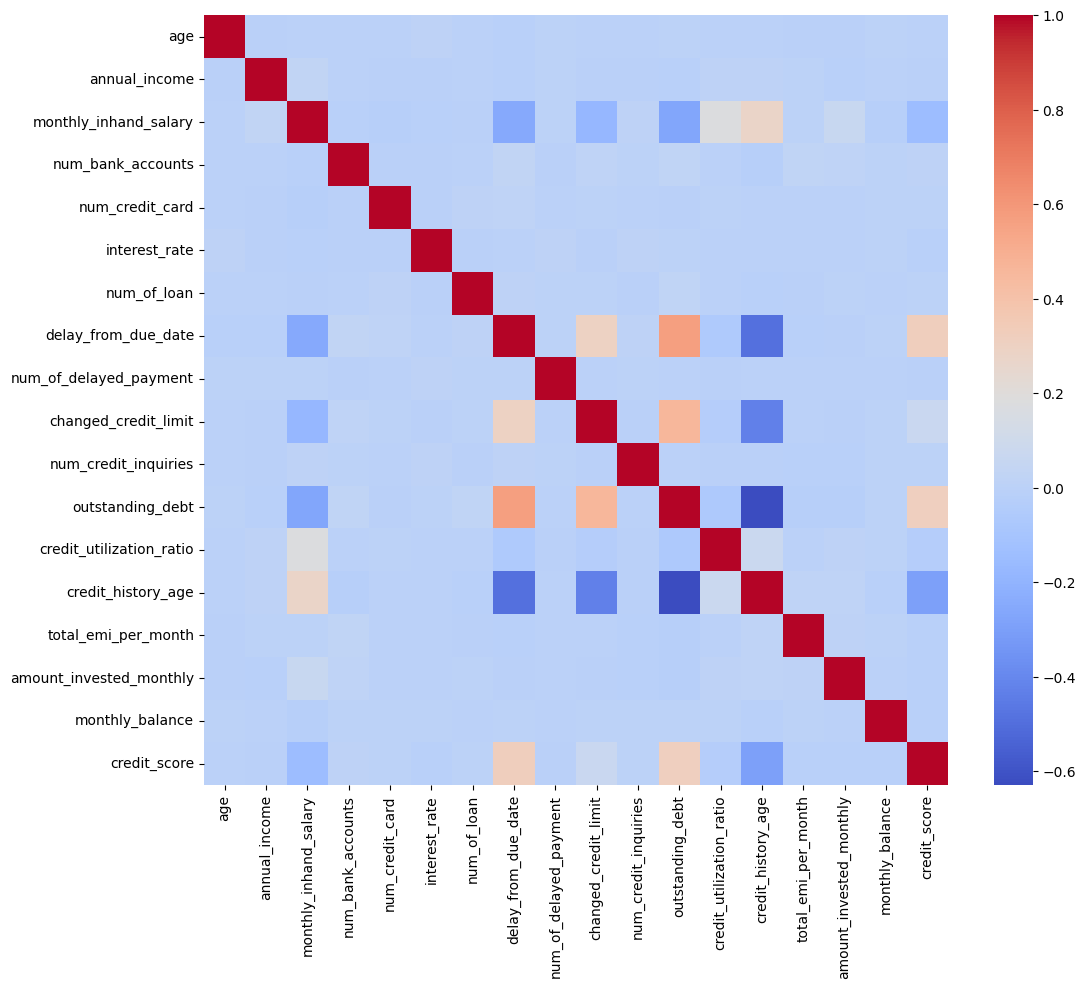

In [62]:
# Checking the correlation between the features
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')

In [63]:
df_nn = df.dropna()
df_fn = df.fillna(0)

In [64]:
df_nn.shape

(7986, 22)

In [65]:
df_fn.shape

(12500, 22)

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

ss_attribs = ['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts', 
               'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 
               'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 
               'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age', 
               'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance', 
               'credit_score']

oh_attribs = ['payment_of_min_amount', 'payment_behaviour']


full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), ss_attribs),
        ("cat", OneHotEncoder(sparse=False), oh_attribs)
    ],verbose_feature_names_out=False).set_output(transform='pandas')

data_prepared = full_pipeline.fit_transform(df_fn)

/Users/raimundosandoval/.pyenv/versions/3.10.6/envs/proyecto2/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [67]:
data_prepared

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,payment_of_min_amount_NM,payment_of_min_amount_No,payment_of_min_amount_Yes,payment_behaviour_!@9#%8,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
0,-0.124567,-0.109807,-0.523339,-0.121910,-0.145247,-0.149816,0.013833,-1.215198,-0.107741,0.157198,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.117042,-0.097684,-0.154233,-0.130655,-0.145247,-0.143415,-0.032248,-1.215198,-0.116457,-0.692152,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.108013,-0.014223,2.629469,-0.139400,-0.137672,-0.139148,-0.001527,-0.878781,-0.107741,-0.448237,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.076409,-0.100887,-0.283693,-0.130655,-0.137672,-0.147682,-1.583644,-1.147915,-0.094667,-1.190147,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.127577,-0.097144,-0.210422,-0.086928,-0.137672,-0.145549,-1.583644,-1.349765,-0.068518,-1.104486,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,-0.130587,-0.091476,-0.023303,-0.148146,-0.145247,-0.143415,-0.032248,-0.811498,-0.133889,-0.738613,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12496,-0.091458,-0.111682,-1.078557,-0.139400,-0.167974,-0.145549,0.013833,-1.349765,-0.133889,-0.652952,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12497,-0.083934,-0.095880,-0.136276,-0.139400,-0.145247,-0.145549,-0.001527,-0.946064,-0.094667,-0.697960,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12498,-0.115537,-0.109122,-0.491373,-0.060692,-0.114944,-0.094339,0.029193,0.803305,-0.024938,1.179321,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [68]:
from sklearn.model_selection import train_test_split 
X = df.drop(columns=['credit_score'])
y = df['credit_score']

In [69]:
X.isnull().sum()

customer_id                    0
age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1916
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment       840
changed_credit_limit         254
num_credit_inquiries         257
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          1120
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly      586
payment_behaviour              0
monthly_balance              355
dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

ss_attribs = ['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts', 
              'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 
              'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 
              'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age', 
              'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']

oh_attribs = ['payment_of_min_amount', 'payment_behaviour']

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('std_scaler', StandardScaler())
    ]), ss_attribs),
    ("cat", Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(sparse_output=False))
    ]), oh_attribs)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [76]:
param_grid = {
    'model__C': [0.1, 1, 10, 100],  
    'model__penalty': ['l1', 'l2'], 
    'model__solver': ['liblinear'] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters:  {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [80]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

y_pred = grid_search.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      2685
           1       0.57      0.33      0.42      1065

    accuracy                           0.74      3750
   macro avg       0.67      0.62      0.62      3750
weighted avg       0.72      0.74      0.71      3750



In [81]:
model_results = {}

model_results['linear'] = {
    'best_params': grid_search.best_params_,
    'classification_report': report,
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='weighted'),
    'recall': recall_score(y_test, y_pred, average='weighted'),
    'f1_score': f1_score(y_test, y_pred, average='weighted')
}

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

models = [
    ('KNeighborsClassifier', KNeighborsClassifier(), {'model__n_neighbors': [3, 5, 7]}),
    ('DecisionTreeClassifier', DecisionTreeClassifier(), {'model__max_depth': [3, 5, 7], 'model__min_samples_leaf': [1, 2, 3]}),
    ('SVC', SVC(), {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}),
    ('RandomForestClassifier', RandomForestClassifier(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 5, 7]}),
    ('LightGBMClassifier', LGBMClassifier(), {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.05, 0.1, 0.2]}),
    ('XGBClassifier', XGBClassifier(), {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.05, 0.1, 0.2]})
]

for model_name, model, params in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    print(f'Training {model_name} classifier:')

    param_grid = params

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    model_results[model_name] = {
        'best_params': grid_search.best_params_,
        'classification_report': report,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }


Training KNeighborsClassifier classifier
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training DecisionTreeClassifier classifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training SVC classifier
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training RandomForestClassifier classifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training LightGBMClassifier classifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 2030, number of negative: 4970
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2328
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290000 -> initscore=-0.895384
[LightGBM] [Info] Start training from score -0.895384
[LightGBM] [Info

In [85]:
for model_name, model_result in model_results.items():
    print(f"{model_name}:\n Precision: {model_result['precision']} | Accuracy: {model_result['accuracy']} \n")

linear:
 Precision: 0.7154822164366199 | Accuracy: 0.7397333333333334 

KNeighborsClassifier:
 Precision: 0.7258766298204962 | Accuracy: 0.7408 

DecisionTreeClassifier:
 Precision: 0.7661667980158545 | Accuracy: 0.7749333333333334 

SVC:
 Precision: 0.7328897804283003 | Accuracy: 0.7493333333333333 

RandomForestClassifier:
 Precision: 0.7701287018829491 | Accuracy: 0.7797333333333333 

LightGBMClassifier:
 Precision: 0.7789296986720847 | Accuracy: 0.7866666666666666 

XGBClassifier:
 Precision: 0.7735269602904203 | Accuracy: 0.7816 



---

## Secciones Requeridas en el Informe

La siguiente lista detalla las secciones que debe contener su notebook para resolver el proyecto. 
Es importante que al momento de desarrollar cada una de las secciones, estas sean escritas en un formato tipo **informe**, donde describan detalladamente cada uno de los puntos realizados.

### 1. Introducción [0.5 puntos]

_Esta sección es literalmente una muy breve introducción con todo lo necesario para entender que hicieron en su proyecto._

- Describir brevemente el problema planteado (¿Qué se intenta predecir?)
- Describir brevemente los datos de entrada que les provee el problema.
- Describir las métricas que utilizarán para evaluar los modelos generados. Eligan **una métrica** adecuada para el desarrollo del proyecto **según la tarea que deben resolver y la institución a la cuál será su contraparte** y luego justifiquen su elección. Considerando que los datos presentan desbalanceo y que el uso de la métrica 'accuracy' sería incorrecto, enfoquen su elección en una de las métricas precision, recall o f1-score y en la clase que será evaluada.
- [Escribir al final] Describir brevemente el modelo que usaron para resolver el problema (incluyendo las transformaciones intermedias de datos).
- [Escribir al final] Indicar si lograron resolver el problema a través de su modelo. Indiquen además si creen que los resultados de su mejor modelo son aceptables y como les fue con respecto al resto de los equipos.

### 2. Carga de datos Análisis Exploratorio de Datos [Sin puntaje]

_La idea de esta sección es que cargen y exploren el dataset para así obtener una idea de como son los datos y como se relacionan con el problema._
~~Cargue los datos y realice un análisis exploratorio de datos para investigar patrones, tendencias y relaciones en un conjunto de datos. Se adjuntan diversos scripts para abodar rápidamente este punto. La descripción de las columnas las pueden encontrar en el siguiente [enlace](https://www.kaggle.com/datasets/parisrohan/credit-score-classification).~~

**NO deben escribir nada**, solo ejecutar el código y encontrar los patrones con los cuales se basaran para generar el modelo.

### 3. Preparación de Datos [0.5 puntos]

_Esta sección consiste en generar los distintos pasos para preparar sus datos con el fin de luego poder crear su modelo._

#### 3.1 Preprocesamiento con `ColumnTransformer`

- ~~Convierta las columnas mal leidas a sus tipos correspondientes (float, str, etc...)~~
- Genere un `ColumnTransformer` que:
  - ~~Preprocese datos categóricos y ordinales.~~
  - ~~Escale/estandarice datos numéricos.~~
  - ~~Uitlice `.set_output(transform="pandas")` sobre su `ColumnTransformer` para setear el formato de salida a de las transformaciones a pandas.~~

- ~~Luego, pruebe las transformaciones utilizando `fit_transform`.~~

- ~~Posteriormente, ejecute un Holdout que le permita más adelante evaluar los modelos.~~

#### 3.2 Holdout 

~~Ejecute `train_test_split` para generar un conjunto de entrenamiento y de prueba~~

Si bien tienen la libertad de generar conjuntos de validación para robustecer sus resultados, este no es requisito obligatorio y no se le asignará puntaje por esto (esto debido a que grid-search ocupa internamente cross validation).

#### 3.3 Datos nulos.

~~Como habrá visto, existe la posibilidad de que algunos datos sean nulos. En esta sección se le solicita justificar, previo a comenzar el modelado, decidir si conservar e imputar los datos nulos o eliminar las filas~~

Note que la decisión que tomen aquí puede afectar fuertemente el rendimiento de los modelos. 
Y como siempre, más adelante tienen el espacio para experimentar con ambas opciones.

#### 3.4 Feature Engineering [Bonus - 0.5 puntos]

En esta sección, se espera que apliquen su conocimiento y creatividad para identificar y construir características que brinden una mejor orientación a su modelo para identificar los casos deseados. Para motivar la construcción de nuevas características, se recomienda explorar las siguientes posibilidades:

- Generar ratios que relacionen variables categóricas con numéricas. Estos ratios permiten capturar relaciones proporcionales o comparativas entre diferentes categorías y valores numéricos.
- Combinación de rankings entre variables numéricas y categóricas.
- Discretización de variables numéricas a categóricas.
- Etc...

**Importantes**: Al explorar estas posibilidades no se limiten solo a estas propuestas, pueden aplicar otras técnicas de feature engineering pertinentes para mejorar la capacidad de su modelo para comprender y aprovechar los patrones presentes en los datos. 

### 4. Baseline [1.5 puntos]

_En esta sección deben crear los modelos más básicos posibles que resuelvan el problema dado. La idea de estos modelos son usarlos como comparación para que en el siguiente paso lo puedan mejorar._

Implemente, entrene y evalúe varias `Pipeline` enfocadas en resolver el problema de clasificación en donde la diferencia entre estas sea el modelo utilizado.


Para esto, cada Pipeline debe:

- ~~Tener el `ColumnTransformer` implementado en la sección anterior como primer paso.~~
- ~~Implementar un imputador en caso de haber decidido conservar los datos nulos.~~
- ~~Implementar un clasificador en la salida (ver siguiente lista).~~
  
Y además, 
- Ser evaluado de forma general imprimiendo un `classification_report`.
- Calcular y guardar la métrica seleccionada en el punto 1.2 en un arreglo de métricas (guardar nombre y valor de la métrica).

Lo anterior debe ser implementado utilizando los siguientes modelos:

- `Dummy` con estrategia estratificada.
- ~~`LogisticRegression`.~~
- ~~`KNeighborsClassifier`.~~
- ~~`DecisionTreeClassifier`~~
- ~~`SVC`~~
- ~~`RandomForestClassifier`~~
- ~~`LightGBMClassifier` (del paquete `lightgbm`)~~
- ~~`XGBClassifier` (del paquete `xgboost`).~~


Luego, transformando el diccionario de las métricas a un pandas `DataFrame`, ordene según los valores de su métrica de mayor a menor y responda.
- ¿Hay algún clasificador entrenado mejor que el azar (`Dummy`)?
- ¿Cuál es el mejor clasificador entrenado?
- ¿Por qué el mejor clasificador es mejor que los otros?
- Respecto al tiempo de entrenamiento, con cual cree que sería mejor experimentar (piense en el tiempo que le tomaría pasar el modelo por una grilla de optimización de hiperparámetros).

**Nota**: Puede utilizar un for más una lista con las clases de los modelos mencionados para simplificar el proceso anterior.


### 5. Optimización del Modelo [1.5 puntos]

_En esta sección deben mejorar del modelo de clasificación al variar los algoritmos/hiperparámetros que están ocupando._

- Instanciar dos nuevas `Pipeline`, similares a la anterior, pero ahora enfocada en buscar el mejor modelo. Para esto, la pipelines debe utilizar el primer y segundo mejor modelo encontrado en el paso anterior.
- Usar **`GridSearchCV`** o **`HalvingGridSearchCV`** para tunear hipermarámetros. La primera demorará más que la segunda pero les traerá potencialmente mejores resultados.
- **Importante**: Recuerden setear la búsqueda para optimizar la métrica seleccionada en los puntos anteriores.

Algunas ideas para mejorar el rendimiento de sus modelos:

- Agregar técnicas de seleccion de atributos/características. El parámetro de cuántas características se seleccionan debe ser parametrizable y configurado por el optimizador de hiperparámetros.
- Variar el imputador de datos en caso de usarlo.

#### Bonus

1. **Optuna** [0.5 extras]: Pueden probar también [`OptunaSearchCV`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html) de la librería [`Optuna`](https://optuna.org/), la cuál es bastante popular para buscar modelos de redes neuronales.
2. **Visualización con Optuna** [0.2 extras]: Explore la documentación de visualización de Optuna en el siguiente [link](https://optuna.readthedocs.io/en/stable/reference/visualization/index.html) y realice un análisis sobre el proceso de optimización de hiperparámetros realizado.
3. **Imabalanced learn** [0.3 extras]: Al ser el problema desbalanceado, pueden probar técnicas para balancear automáticamente el dataset previo a ejecutar el modelo. Para esto, puede probar con los mecanismos implementados en la librería [Imbalanced learn](https://imbalanced-learn.org/). 
4. **Probar pycaret (AutoML) [0.3 extras]**.

Algunas notas interesantes sobre este proceso:

- No se les pide rendimientos cercanos al 100% de la métrica para concretar exitosamente el proyecto. Por otra parte, celebren cada progreso que obtengan.
- **Hacer grillas computables**: Si la grilla se va a demorar 1/3 la edad del universo en explorarse completamente, entonces achíquenla a algo que sepan que va a terminar.
- Aprovechen el procesamiento paralelo (con `njobs`) para acelerar la búsqueda. Sin embargo, si tienen problemas con la memoria RAM, reduzca la cantidad de jobs a algo que su computador/interprete web pueda procesar.
- La pipelines permiten cachear (guardar temporalmente) etapas cuyo cálculo es redudante, como por ejemplo el escalamiento y la imputación, acelerando así la computación. **Importante:** Para esto, cuando ejecuten `GridSearchCV`, agreguen a la pipeline en el parámetro `memory = "."`.

**Al final de este proceso, seleccione el mejor modelo encontrado, prediga el conjunto de prueba y reporte sus resultados.**

### 6. Interpretabilidad [1.0 puntos]

_En esta sección, se espera que los estudiantes demuestren su capacidad para explicar cómo sus modelos toman decisiones utilizando los datos. Dentro del análisis de interpretabilidad propuesto para el modelo, deberán ser capaces de:_

- Proponer un método para analizar la interpretabilidad del modelo. Es crucial que puedan justificar por qué el método propuesto es el más adecuado y explicar los alcances que podría tener en su aplicación.
- Identificar las características más relevantes del modelo. ¿La distribución de importancia es coherente y equitativa entre todas las variables?
- Analizar 10 observaciones aleatorias utilizando un método específico para verificar la coherencia de las interacciones entre las características.
- Explorar cómo se relacionan las variables utilizando algún descriptivo de interpretabilidad.
- ¿Existen variables irrelevantes en el problema modelado?, ¿Cuales son?.

Es fundamental que los estudiantes sean capaces de determinar si su modelo toma decisiones coherentes y evaluar el impacto que podría tener la aplicación de un modelo con esas variables en una población. ¿Es posible que el modelo sea perjudicial o que las estimaciones se basen en decisiones sesgadas?

En resumen, esta sección busca que los estudiantes apliquen un enfoque crítico para evaluar la interpretabilidad de su modelo, identificar posibles sesgos y analizar las implicaciones de sus decisiones en la población objetivo.

### 7. Concluir [1.0 puntos]

_Aquí deben escribir una breve conclusión del trabajo que hicieron en donde incluyan (pero no se limiten) a responder las siguientes preguntas:_

- ¿Pudieron resolver exitosamente el problema?
- ¿Son aceptables los resultados obtenidos?
- ¿En que medida el EDA ayudó a comprender los datos en miras de generar un modelo predictivo?

Respecto a la clasificación:

- ¿Como fue el rendimiento del baseline para la clasificación?
- ¿Pudieron optimizar el baseline para la clasificación?
- ¿Que tanto mejoro el baseline de la clasificación con respecto a sus optimizaciones?

Finalmente:

- ¿Estuvieron conformes con sus resultados?
- ¿Creen que hayan mejores formas de modelar el problema?
- ¿En general, qué aprendieron del proyecto? ¿Qué no aprendieron y les gustaría haber aprendido?

**OJO** si usted decide responder parte de estas preguntas, debe redactarlas en un formato de informe y no responderlas directamente.

### Otras Instrucciones

Recordar el uso de buenas prácticas de MLOPS como replicabilidad (fijar semillas aleatorias) o el uso del registro de experimentos (con MLFlow). Si bien son opcionales, es altamente recomendado su uso.

### 8. Bonus: Implementación de Kedro y FastAPI [1.5 puntos]

**OPCIONAL**

En esta sección se les solicita utilizar las últimas tecnologías vistas en el curso para la productivización del proyecto de ciencia de datos, centrándose en la organización y gestión de los flujos de trabajo a través de componentes y pipelines, más el servicio del modelo a través del desarrollo de una API.

Para esto: 

1. Genere un proyecto de `Kedro` en donde separe por responsabilidades los nodos/componentes de su proyecto de ciencia de datos en módulos separados. [1.0 puntos]
2. Genere un servidor basado en `FastAPI` el cuál a través de un método post, reciba un batch de datos y genere predicciones para cada uno de ellos. [0.5 puntos]

Las implementaciones son libres. Es decir, usted decide qué componentes implementar, como usar el catálogo de datos y la parametrización del flujo. Sin embargo, evaluaremos buen uso de los framework, modularización y separación de responsabilidades.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>